## Model naiwnego klasyfikatora Bayesowskiego

### 1. Zalety i wady naiwnego klasyfikatora Bajesowskiego w kontekście naszego projektu

**Zalety**

- **Mniejsza złożoność:** Naïve Bayes jest prostszy w porównaniu do innych klasyfikatorów. 
- **Dobra skalowalność:** Jest szybki i efektywny, a także wymaga niewielkiej ilości pamięci.
- **Obsługa danych o wysokiej wymiarowości:** Sprawdza się w przypadkach takich jak klasyfikacja dokumentów, gdzie liczba wymiarów jest wysoka.

**Wady**

- **Zjawisko zerowej częstości:** Występuje, gdy zmienna kategoryczna nie istnieje w zbiorze treningowym, co prowadzi do zerowego prawdopodobieństwa warunkowego. Problem ten można rozwiązać za pomocą wygładzania Laplace’a.
- **Nierealistyczne założenie podstawowe:** Założenie o niezależności warunkowej nie zawsze jest spełnione, co może prowadzić do błędnych klasyfikacji.

**Zastosowania klasyfikatora Naïve Bayes**

- **Filtrowanie spamu:** Jedno z najpopularniejszych zastosowań, gdzie Naïve Bayes służy do klasyfikacji wiadomości jako spam.
- **Klasyfikacja dokumentów:** Używany do klasyfikacji treści, np. artykułów na stronach mediów informacyjnych.
- **Analiza sentymentu:** Pomaga w zrozumieniu opinii i postaw wobec produktów i marek.
- **Przewidywanie stanów umysłowych:** Wykorzystywany w analizie danych fMRI do przewidywania stanów poznawczych ludzi.
źródło IBM

**Klasyfikator Complement Native Bayes** jest wyjątkowo przystosowany do radzenia sobie z nierównymi zestawami danych, więc to on został wybrany do bieżącego probelemu.

### 2. Import bibliotek oraz danych z plików .csv

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold, cross_validate, train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [41]:
# Wczytanie danych z pliku CSV (X_test.csv, X_train.csv, y_test.csv, y_train.csv)
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Wyswietl informacje o danych
print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape, "y_test shape: ", y_test.shape)

X_train shape:  (1052, 5) y_train shape:  (1052, 1)
X_test shape:  (451, 5) y_test shape:  (451, 1)


### 3. Narysowanie histogramów opisujących częstotliwości występowania poziomów każdej cechy

In [42]:
#definicja metody rysującej diagramy dla kazdej cechy
def draw_frequency_diagram(X_train, X_test):

    #Do celów prezentacji danych łączymy tymaczasowo dane treningowe i testowe w jednym DataFrame
    X_combined = pd.concat([X_train, X_test], ignore_index=True)

    num_columns = X_combined.shape[1]

    # Narysuj histogram
    for i in range(num_columns):
        column_data = X_combined[X_combined.columns[i]] 
        plt.hist(column_data, bins=20, color='skyblue', edgecolor='black')
        plt.xlabel(X_combined.columns[i])
        plt.ylabel('Częstotliwość')
        plt.title(f'Histogram dla {X_combined.columns[i]}')
        plt.show()

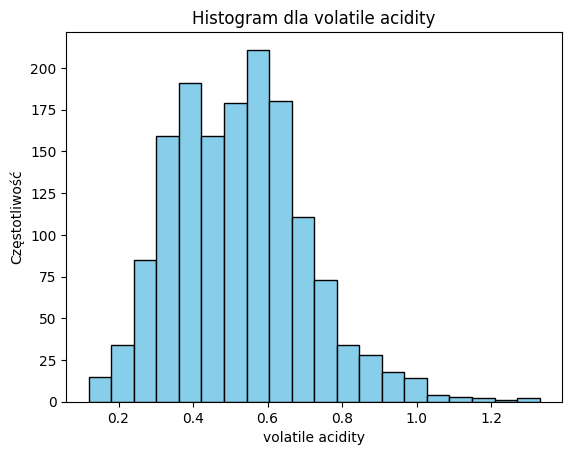

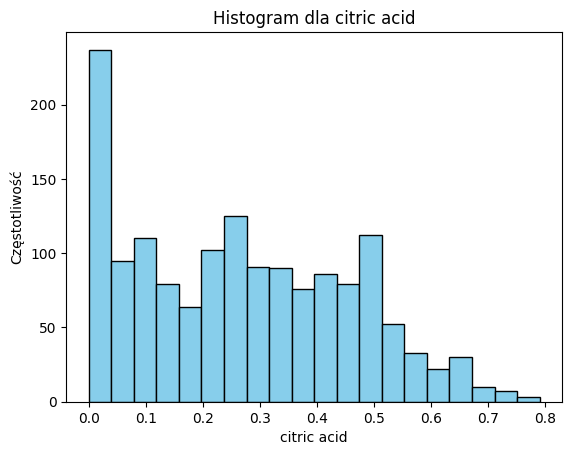

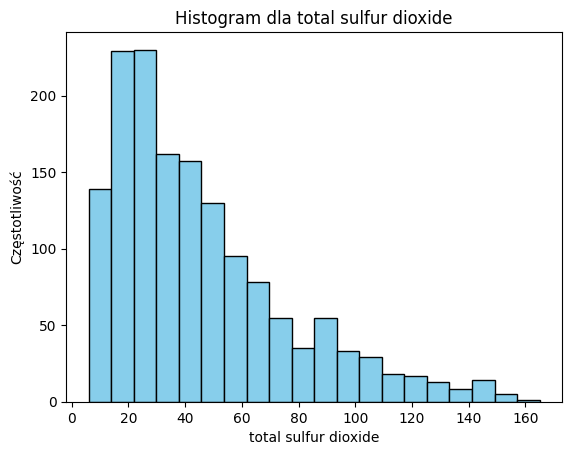

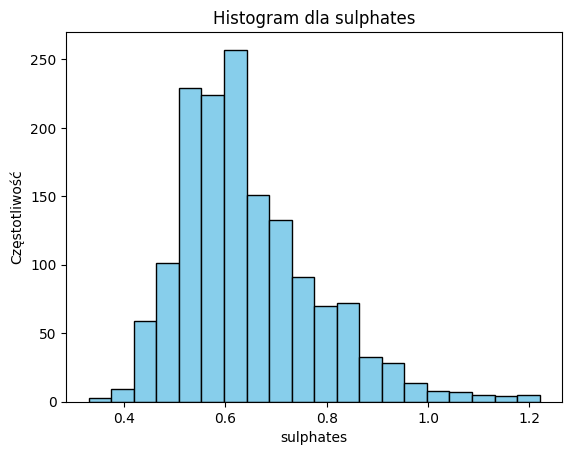

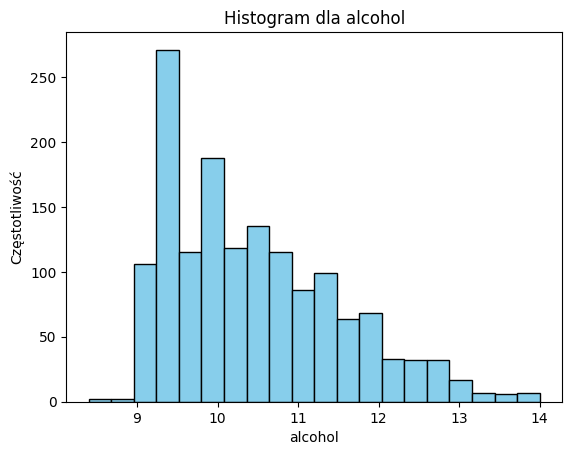

In [43]:
draw_frequency_diagram(X_train, X_test)

### 4. Utworzenie i uczenie modelu

In [44]:
# Utworzenie i trening modelu Complement Naive Bayes
cnb = ComplementNB()

#uczenie modelu
cnb.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred_cnb = cnb.predict(X_test)

C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 5. Ocena parametrów jakościowych modelu (przed hiperparametryzacją)

In [45]:
# Ocena modelu Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_cnb)
print("Accuracy Naive Bayes:", accuracy_nb)

# Oblicz i wyświetl raport klasyfikacji
report_nb = classification_report(y_test, y_pred_cnb)
print(report_nb)

Accuracy Naive Bayes: 0.4678492239467849
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        16
           5       0.52      0.57      0.54       173
           6       0.43      0.60      0.50       187
           7       0.00      0.00      0.00        71
           8       0.00      0.00      0.00         2

    accuracy                           0.47       451
   macro avg       0.16      0.20      0.17       451
weighted avg       0.38      0.47      0.42       451



C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

### 6. Hiperparametryzacja

In [46]:
from sklearn.model_selection import RandomizedSearchCV

# Przeszukiwanie hiperparametrów dla modelu Decision Tree
param_grid = {
        'alpha': np.logspace(-3, 1, num=100),
        'force_alpha': [True, False],
        'fit_prior': [True, False],
        'norm': [True, False]
        }

#Inicjalizacja modelu do optymalizacji
opt_nb = ComplementNB()

#Inicjalizacja optymalizatora losowego
random_search = RandomizedSearchCV(opt_nb, param_distributions=param_grid, n_iter=5, cv=5, scoring='accuracy', random_state=42)
    
#uczenie modelu
random_search.fit(X_train, y_train)

# Calculate the best params and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

Best Hyperparameters: {'norm': False, 'force_alpha': False, 'fit_prior': True, 'alpha': 0.15199110829529347}
Best Score: 0.4952516361995035


C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

### 7. Ponowne uczenie modelu (z uwzglednieniem najlepszych hiperparametrów)

In [47]:
# Uczenie modelu z najlepszymi hiperparametrami
opt_nb  = random_search.best_estimator_
opt_nb.fit(X_train, y_train)

# Przewidywanie na zbiorze testowym
y_pred_nb = opt_nb.predict(X_test)

C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 8. Ocena parametrów jakościowych modelu (po hiperparametryzacji)

In [48]:
# Ocena modelu Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_nb)
print("Accuracy Decision Tree:", accuracy_dt)

# Oblicz raport i wyświetl klasyfikacji
report_dt = classification_report(y_test, y_pred_nb)
print(report_dt)

Accuracy Decision Tree: 0.4678492239467849
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        16
           5       0.52      0.57      0.54       173
           6       0.43      0.60      0.50       187
           7       0.00      0.00      0.00        71
           8       0.00      0.00      0.00         2

    accuracy                           0.47       451
   macro avg       0.16      0.20      0.17       451
weighted avg       0.38      0.47      0.42       451



C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bwojt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [ ]:
# Mapowanie indeksów na odpowiadające im oceny wina
labels = np.unique(y_test).astype(str)

Hiperparametryzacja nie przyniosła lepszych wyników od hiperparametrów standardowych, w dalszej częsci analizy posłużymy się więc modelem o standardowych hiperparametrach.

### 9. Prezentacja diagramu
(generacja trwa około 30 sekund, prosze o cierpliwość)

In [ ]:
Y_combined = pd.concat([y_train, y_test], ignore_index=True)
class_names = Y_combined['quality'].unique().tolist()
class_names_str = list(map(str, class_names)) 


#narysuj wykres

### 10. Wyświetlenie macierzy pomyłek modelu

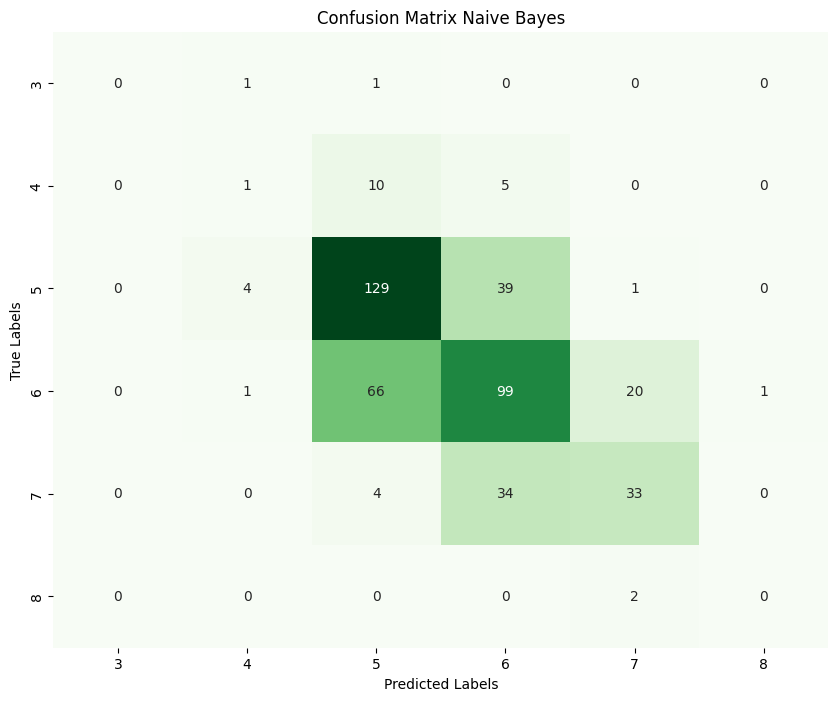

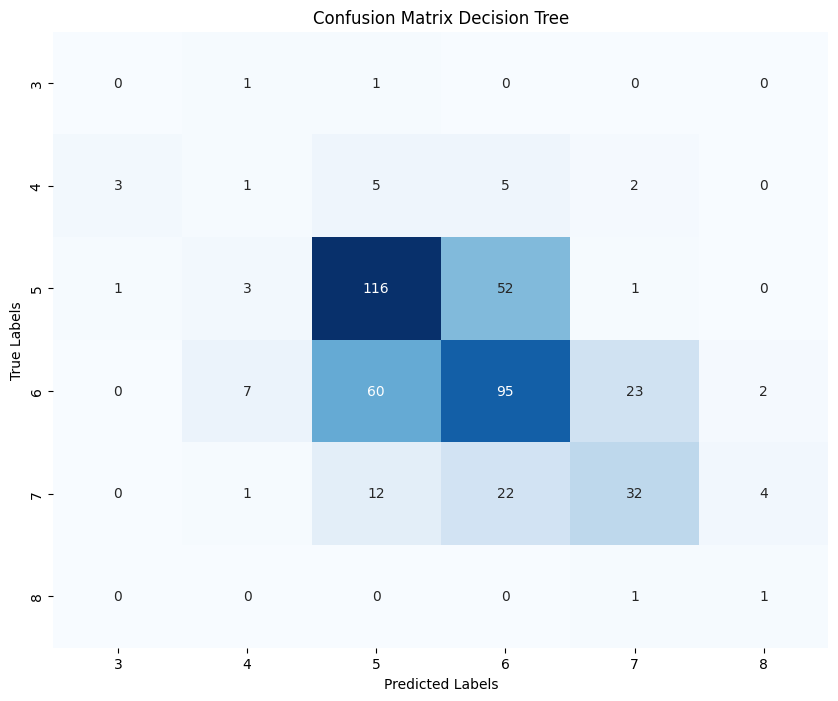

In [ ]:
# Tworzenie macierzy pomyłek
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Mapowanie indeksów na odpowiadające im oceny wina
labels = np.unique(y_test).astype(str)

# Wyświetlenie macierzy pomyłek dla Naive Bayes
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nb, annot=True, fmt='g', cmap='Greens', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

# Wyświetlenie macierzy pomyłek dla Decision Tree
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Decision Tree')
plt.show()

### 11. Podsumowanie

## **Ocena Modelu**



## **Rekomendacje**

